<a target="_blank" href="https://colab.research.google.com/github/umangsoni22/cs670-project/blob/assignment1/assignment1/assignment1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Probability Assignment

To get full credit in this assignment you need to use `numpy` libraries  and include adequate explanation of the code in either markdown cells or inline code comments. Sometimes you need to type equations - type equations in Latex math notation. 

PS: Please note that we run through chatGPT the questions and you will be referred to the Dean if we find that a robot answered your questions.

## Question 1a (10 points)

In a private subreddit people are posting their opinions on the CEO of the company you work for. Lets assume that the employees that are posting are random logging in to that subreddit and that each post indicates whether the employee approves or not the job that the CEO is doing. Let $x_i$ be the binary random variable where $x_i=1$ indicates approval. You can assume that $x$ is distributed according to a Bernoulli distribution with parameter $p=1/2$.

Your job is to sample $n=50$ posts and estimate the approval rate of the CEO by considering the statistics of $y=x_1+x_2+ \dots + x_n$. What is the probability that 25 employees approve the CEO?

## Question 1b (15 points)

Following your findings in Q1a, read about the [Cenral Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) and recognize that 

$$z=\frac{y-\mu_y}{\sigma_y}$$ 

is normally distributed with mean 0 and variance 1.

Can you find the  probability that 25 employees approve the CEO using the Gaussian approximation?


## Answer 1a

Given p = 1/2

We know that the binomial probability distribution is

$$P(r) = (\binom{n}{r})·p^r(1−p)^{n−r}$$

Using above we can calculate probability where 25 employees approve the CEO out of total 50 posts is

$$ P(25) = \frac{50!}{25!(50-25)!}.(1/2)^{25}.(1-1/2)^{50-25} $$

$$ P(25) = \frac{126410606437752}{1125899906842624} = 0.1123 $$

Result = 11.23 %

## Answer 1b

$$ \mu_y = np = 25$$
$$ \sigma_y = \sqrt{np(1-p)} = \sqrt{50*0.5*0.5} = 3.54 $$

To determine the minimum area under curve, we'll calculate z-score i.e. distance from mean with std. as base for employees < 24.5 and z < 25.5 to get approximate area under curve and estimate probability for exactly 25 employees.

$$ z1 < \frac{y_1-\mu_y}{\sigma_y} = \frac{24.5-25}{3.54} = -0.141 $$
$$ z2 < \frac{y_2-\mu_y}{\sigma_y} = \frac{25-25.5}{3.54} = 0.141 $$

From z-table, we calculate the Probability of area under curve for using z1 and z2 as

$$ P(Z<-0.14) = 0.4443 $$
$$ P(Z< 0.14) = 0.5557 $$

$$ Approx P(25) = 0.5557 - 0.4443 = 0.1114 $$

Approx Result = 11.14 %

## Question 2 (25 points)

A sequential experiment involves repeatedly drawing a ball from one of the two urns, noting the number on the ball and replacing the ball in the urn. Urn 0 contains a ball with the number 0 and two balls with the number 1. Urn 1 contains five balls with the number 0 and one ball with the number 1. 

The urn from which the first ball is drawn is selected by flipping a fair coin. Urn 0 is used if the outcome is H and urn 1 is used if the outcome is T. **The urn used in a subsequent draws corresponds to the number on the ball drawn in the previous draw.** 

What is the probability of a specific sequence of the numbers on drawn balls being 0011 ? 

## Answer 2

Random variable for container
$$y ∈ \{0, 1\}$$

Random variable for balls
$$y ∈ \{0, 1\}$$

Given Sequence : 0011

For the first trial, probability of selecting Ball 0 is <br>
$$P(X=0)=P(Y=0).P(X=0/Y=0)+P(Y=1).P(X=0/Y=1)$$
$$ = (1/2).(1/3) + (1/2).(5/6) = 2/3$$

For second trial, urn 0, would be selected.
$$P(X=0/Y=0) = 1/3$$

For third trial, urn 0, would be selected.
$$P(X=1/Y=0) = 2/3$$

For fourth trial, urn 1, would be selected.
$$P(X=1/Y=1) = 1/6$$

Using Product rule, the probability of the sequence would be:
$$(2/3).(1/3).(2/3).(1/6) = 0.246 $$

## Question 3 (25 points) 

Referring to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf), simulate and plot the bivariate normal distribution with the shown parameters using the [Cholesky factorization](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cholesky.html) for the simulation. 


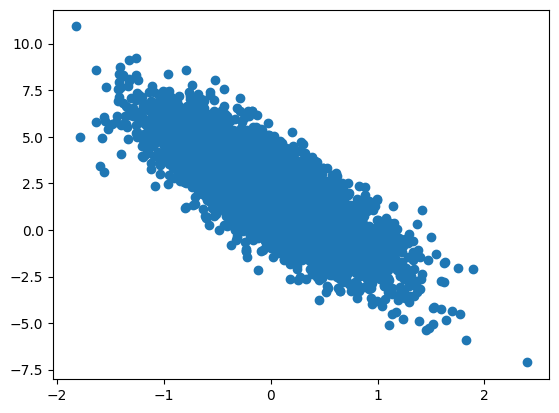

In [48]:
# Type the Python code here and ensure you save the notebook with the results of the code execution.

import numpy as np
import matplotlib.pyplot as plt

mean = np.array([0, 2])
A = np.array([[0.3,-1],[-1,5]])
L = np.linalg.cholesky(A)
X = np.random.normal(size=(5000, 2)) # 5000 Samples
Y = np.dot(L, X.T).T + mean
plt.scatter(Y[:, 0], Y[:, 1])

## Question 4 (25 points)

Go through the provided links on [Poisson](https://dlsun.github.io/probability/poisson.html) and [exponential distributions](https://dlsun.github.io/probability/exponential.html) as the `Math for ML` textbook in your course site  is not covering enough these important distributions.

Watch this video https://www.youtube.com/watch?v=Asto3RS46ks where the author is explaining how to simulate a Poisson distribution from scratch. 

1. Using the Kaggle API download [this dataset](https://www.kaggle.com/datasets/new-york-city/nyc-east-river-bicycle-crossings) and plot the histogram of the number of cyclists that cross the Brooklyn bridge per day.  
2. Simulate the number of cyclists that cross the Brooklyn bridge per day using the Poisson distribution. Ensure that the simulated counts are similar distribution-wise to the observed counts.


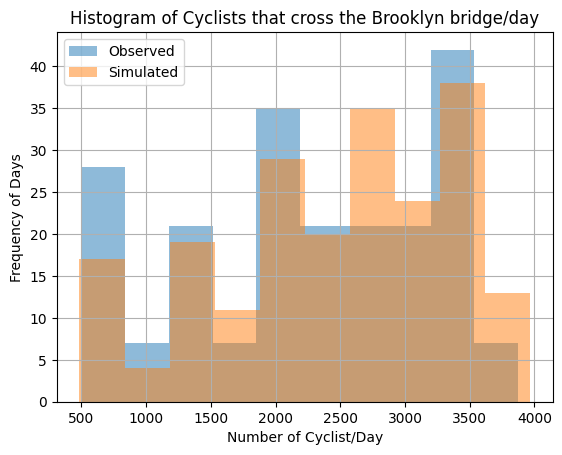

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("nyc-east-river-bicycle-counts.csv")
df.set_index('Day', inplace=True)

# Plot the histogram of the number of cyclists that cross the Brooklyn bridge per day
df['Brooklyn Bridge'].hist(label='Observed', alpha=0.5)

# Generating new data with randomly choosing cyclists counts from dataframe & simulating using poisson distribution.
# This is to ensure the simulated counts are similar distribution-wise to observed counts
df['Brooklyn Bridge Random'] = np.random.choice(df['Brooklyn Bridge'], size=len(df))
df['Brooklyn Bridge Simulated'] = np.random.poisson(df['Brooklyn Bridge Random'], size=len(df))

# Plot the histogram of the simulated number of cyclists that cross the Brooklyn bridge per day
df['Brooklyn Bridge Simulated'].hist(label='Simulated', alpha=0.5)

plt.ylabel('Frequency of Days')
plt.xlabel('Number of Cyclist/Day')
plt.title('Histogram of Cyclists that cross the Brooklyn bridge/day')
plt.legend()
plt.show()

# Uncomment to see the random choice and simulated values.
# df[['Brooklyn Bridge', 'Brooklyn Bridge Random', 'Brooklyn Bridge Simulated']]